In [57]:
import geopandas as gpd
from geopandas import GeoDataFrame
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [16]:
db1=gpd.read_file(r"C:\Users\Ahammad Sahil\Downloads\Farmer_Locations_Data.csv")
db1

,id,Farmer_ID,Farmer_Nam,Place,Latitude,Longitude,geometry
0,1,1,Prasanna,Pongumoodu,8.509269926,76.92525522,None
1,2,2,Valsala,Kazhakuttom,8.548454149,76.8786651,None
2,3,3,Suma,Kazhakuttom,8.545493541,76.86390966,None
3,4,4,Mathew,Varkala,8.770536357,76.72157426,None
4,5,5,Mathunni,Kazhakuttom,8.55779401,76.88173023,None
...,...,...,...,...,...,...,...
540,541,541,prabha,Varkala,8.78343497,76.72459696,None
541,542,542,Niyas,Varkala,8.781072396,76.73064237,None
542,543,543,Arunkumar,Varkala,8.776138785,76.70368123,None
543,544,544,Sheena,Aryanad,8.567467886,77.04618502,None


In [6]:
db2=gpd.read_file(r"C:\Users\Ahammad Sahil\Downloads\Farmer_Loc.csv")
db2

,Farmer_ID,Farmer_Name,No_of_cattles,Disease_data,Vaccine_status,geometry
0,1,Prasanna,5,Bluetongue.,Vaccinated,None
1,2,Valsala,4,Schmallenberg Virus,Vaccinated,None
2,3,Suma,7,Botulism.,Vaccinated,None
3,4,Mathew,8,Schmallenberg Virus,Vaccinated,None
4,5,Mathunni,1,Brucellosis.,Not_Vaccinated,None
...,...,...,...,...,...,...
759,,,,,,None
760,,,,,,None
761,,,,,,None
762,,,,,,None


In [14]:
db=db1.merge(db2)
db

,id,Farmer_ID,Farmer_Nam,Place,Latitude,Longitude,geometry,Farmer_Name,No_of_cattles,Disease_data,Vaccine_status
0,1,1,Prasanna,Pongumoodu,8.509269926,76.92525522,None,Prasanna,5,Bluetongue.,Vaccinated
1,2,2,Valsala,Kazhakuttom,8.548454149,76.8786651,None,Valsala,4,Schmallenberg Virus,Vaccinated
2,3,3,Suma,Kazhakuttom,8.545493541,76.86390966,None,Suma,7,Botulism.,Vaccinated
3,4,4,Mathew,Varkala,8.770536357,76.72157426,None,Mathew,8,Schmallenberg Virus,Vaccinated
4,5,5,Mathunni,Kazhakuttom,8.55779401,76.88173023,None,Mathunni,1,Brucellosis.,Not_Vaccinated
...,...,...,...,...,...,...,...,...,...,...,...
540,541,541,prabha,Varkala,8.78343497,76.72459696,None,prabha,4,No disease,Vaccinated
541,542,542,Niyas,Varkala,8.781072396,76.73064237,None,Niyas,5,Botulism.,Vaccinated
542,543,543,Arunkumar,Varkala,8.776138785,76.70368123,None,Arunkumar,3,No disease,Vaccinated
543,544,544,Sheena,Aryanad,8.567467886,77.04618502,None,Sheena,7,No disease,Vaccinated


In [67]:
dbplot=gpd.GeoDataFrame(db,geometry=gpd.points_from_xy(db.Longitude,db.Latitude),crs={'init':'epsg:4326'})

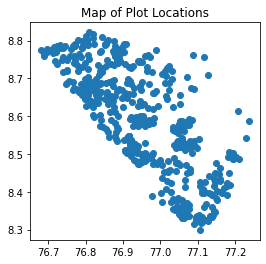

In [68]:
fig, ax = plt.subplots()
dbplot.plot(ax=ax)
plt.title("Map of Plot Locations")
plt.show()

In [76]:
db_new=dbplot.to_crs('epsg:32643')
db_new.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 72°E to 78°E - by country
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

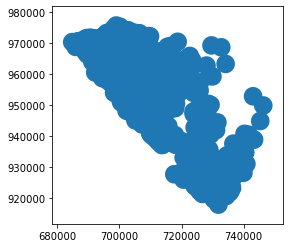

In [78]:
buffer=db_new.buffer(3000)
buffer.plot()

In [79]:
db_new

,id,Farmer_ID,Farmer_Nam,Place,Latitude,Longitude,geometry,Farmer_Name,No_of_cattles,Disease_data,Vaccine_status
0,1,1,Prasanna,Pongumoodu,8.509269926,76.92525522,POINT (711928.341 941126.147),Prasanna,5,Bluetongue.,Vaccinated
1,2,2,Valsala,Kazhakuttom,8.548454149,76.8786651,POINT (706776.915 945435.171),Valsala,4,Schmallenberg Virus,Vaccinated
2,3,3,Suma,Kazhakuttom,8.545493541,76.86390966,POINT (705153.875 945099.805),Suma,7,Botulism.,Vaccinated
3,4,4,Mathew,Varkala,8.770536357,76.72157426,POINT (689370.181 969917.372),Mathew,8,Schmallenberg Virus,Vaccinated
4,5,5,Mathunni,Kazhakuttom,8.55779401,76.88173023,POINT (707109.350 946469.918),Mathunni,1,Brucellosis.,Not_Vaccinated
...,...,...,...,...,...,...,...,...,...,...,...
540,541,541,prabha,Varkala,8.78343497,76.72459696,POINT (689696.215 971345.536),prabha,4,No disease,Vaccinated
541,542,542,Niyas,Varkala,8.781072396,76.73064237,POINT (690362.576 971087.288),Niyas,5,Botulism.,Vaccinated
542,543,543,Arunkumar,Varkala,8.776138785,76.70368123,POINT (687398.608 970528.041),Arunkumar,3,No disease,Vaccinated
543,544,544,Sheena,Aryanad,8.567467886,77.04618502,POINT (725211.195 947632.466),Sheena,7,No disease,Vaccinated


In [83]:
fm=db_new[db_new.Disease_data=='Foot and Mouth disease.']

<AxesSubplot:>

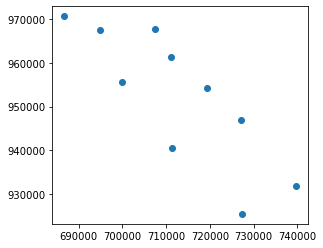

In [86]:
fm.plot()

<AxesSubplot:>

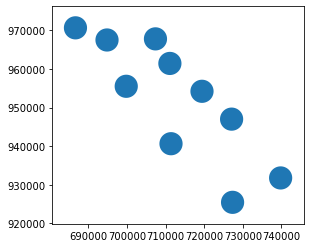

In [87]:
fmb=fm.buffer(3000)
fmb.plot()

In [91]:
fmb2 = gpd.GeoDataFrame(geometry=gpd.GeoSeries(fmb))

In [94]:
import matplotlib.pyplot as plt
spjoin=gpd.sjoin(db_new,fmb2, op='within')


<AxesSubplot:>

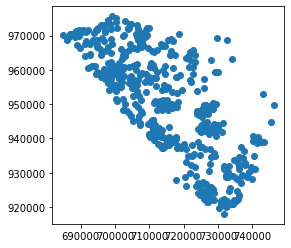

In [96]:
db_new.plot()

<AxesSubplot:>

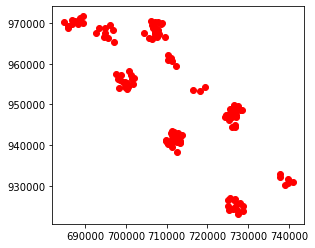

In [102]:
spjoin.plot(color='red')

<AxesSubplot:>

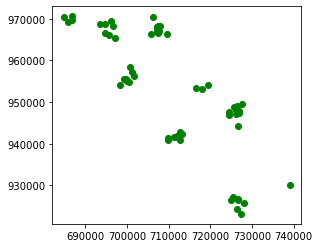

In [101]:
ntvcn=spjoin[spjoin.Vaccine_status=='Not_Vaccinated']
ntvcn.plot(color='green')

In [103]:
ntvcn

,id,Farmer_ID,Farmer_Nam,Place,Latitude,Longitude,geometry,Farmer_Name,No_of_cattles,Disease_data,Vaccine_status,index_right
76,77,77,Suhana,Chakai,8.511549353,76.9068001,POINT (709894.869 941368.222),Suhana,1,No disease,Not_Vaccinated,19
83,84,84,Jose,Chakai,8.508180561,76.90676349,POINT (709892.673 940995.569),Jose,1,Schmallenberg Virus,Not_Vaccinated,19
84,85,85,Teena,Pongumoodu,8.50677995,76.9319928,POINT (712671.645 940854.416),Teena,2,No disease,Not_Vaccinated,19
100,101,101,Lilly M,Pongumoodu,8.512858421,76.92020203,POINT (711369.925 941520.321),Lilly M,3,Botulism.,Not_Vaccinated,19
101,102,102,Sonu,Pongumoodu,8.513078125,76.92503552,POINT (711902.052 941547.269),Sonu,1,Schmallenberg Virus,Not_Vaccinated,19
...,...,...,...,...,...,...,...,...,...,...,...,...
367,368,368,Navaneeth,Aryanad,8.565522237,77.06161124,POINT (726910.922 947426.306),Navaneeth,3,No disease,Not_Vaccinated,357
371,372,372,Anupama,Aryanad,8.580392557,77.05744199,POINT (726443.035 949068.851),Anupama,4,No disease,Not_Vaccinated,357
373,374,374,Prathibha A,Aryanad,8.577960495,77.04986785,POINT (725610.515 948795.348),Prathibha A,3,No disease,Not_Vaccinated,357
399,400,400,Gopalakrishnan,Kattakada,8.537727245,77.05910969,POINT (726651.914 944350.055),Gopalakrishnan,1,Johne's disease.,Not_Vaccinated,357


[]

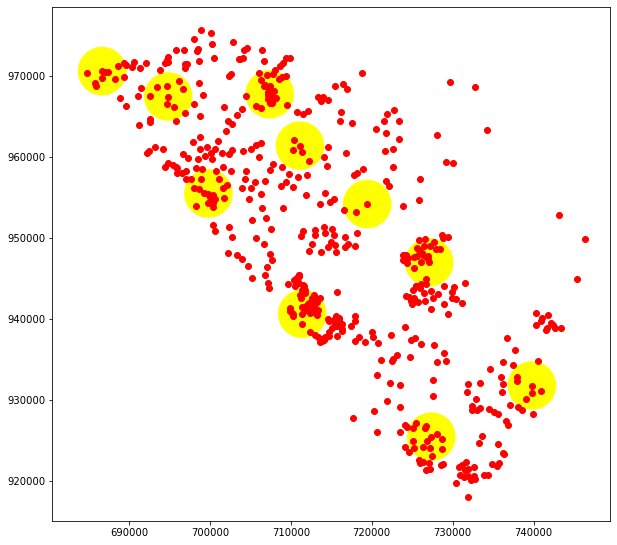

In [104]:
fig, bound = plt.subplots(figsize = (10,10))
fmb.plot(ax = bound,color="yellow")
db_new.plot(ax = bound, color = "red")
plt.plot()

[]

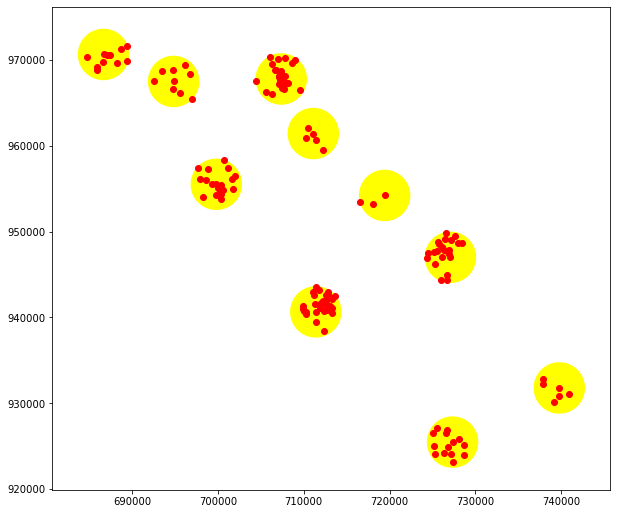

In [105]:
fig, bound = plt.subplots(figsize = (10,10))
fmb.plot(ax = bound,color="yellow")
spjoin.plot(ax = bound, color = "red")
plt.plot()